# Technical Analysis with Python 101

## Setup

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import talib
from api_keys import FMP_API_KEY

plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (16, 8)

In [2]:
%config InlineBackend.figure_format = "retina"

## Downloading data

In [3]:
SYMBOL = "AAPL"
START_DATE = "2021-01-01"

In [4]:
def get_price_data(symbol, start_date):
    hist_price_url = f"https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?from={start_date}&apikey={FMP_API_KEY}"
    r_json = requests.get(hist_price_url).json()
    df = pd.DataFrame(r_json["historical"]).set_index("date").sort_index()
    df.index = pd.to_datetime(df.index)
    return df

In [5]:
df = get_price_data(SYMBOL, START_DATE)
df

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
date,,,,,,,,,,,,
2021-01-04,133.52,133.6100,126.7600,129.410,127.000,143301900,143301900,-4.11,-3.080000,129.93,"January 04, 21",-0.030800
2021-01-05,128.89,131.7400,128.4300,131.010,128.570,97664900,97664900,2.12,1.640000,130.39,"January 05, 21",0.016400
2021-01-06,127.72,131.0500,126.3800,126.600,124.240,155088000,155088000,-1.12,-0.876920,128.01,"January 06, 21",-0.008769
2021-01-07,128.36,131.6300,127.8600,130.920,128.480,109578200,109578200,2.56,1.990000,130.14,"January 07, 21",0.019900
2021-01-08,132.43,132.6300,130.2300,132.050,129.590,105158200,105158200,-0.38,-0.286940,131.64,"January 08, 21",-0.002869
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-20,181.79,182.4300,180.0000,181.560,181.560,53574453,53665600,-0.23,-0.126520,181.10,"February 20, 24",-0.001265
2024-02-21,181.94,182.8888,180.6600,182.320,182.320,41496371,41529700,0.38,0.208860,181.99,"February 21, 24",0.002089
2024-02-22,183.48,184.9550,182.4600,184.370,184.370,52284192,52292200,0.89,0.485070,183.84,"February 22, 24",0.004851


## Technical Indicators

### Simple Moving Average

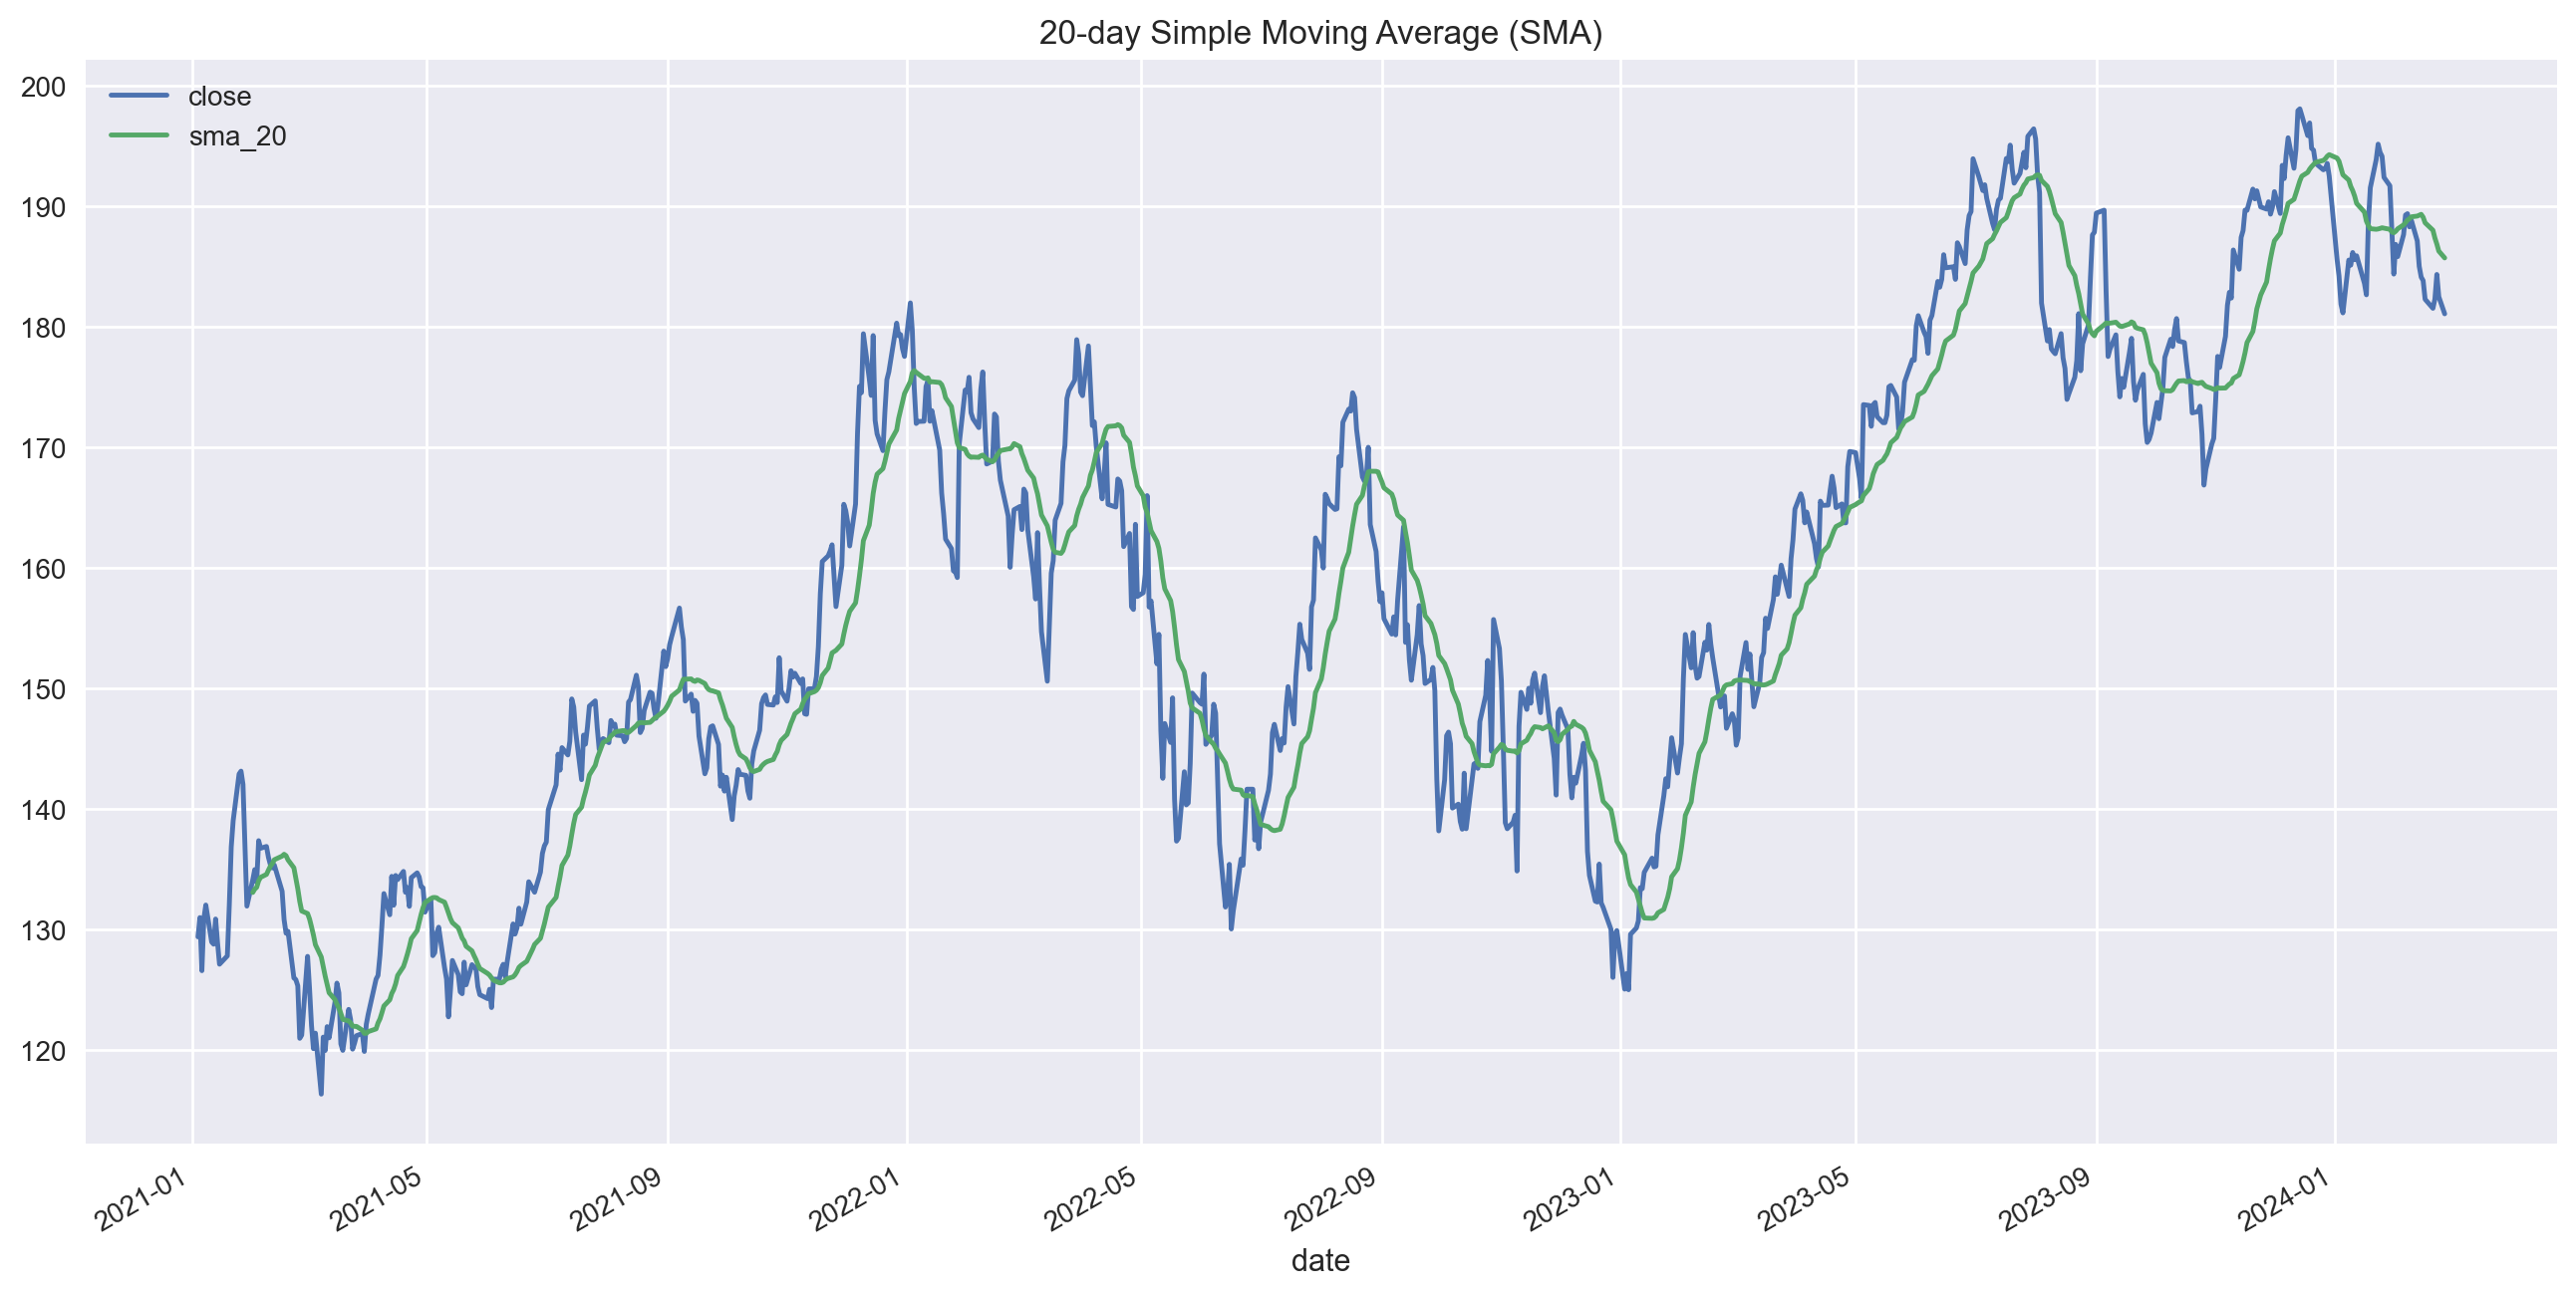

In [6]:
SMA_PERIOD = 20
df[f"sma_{SMA_PERIOD}"] = talib.SMA(df["close"], timeperiod=SMA_PERIOD)
df[["close", f"sma_{SMA_PERIOD}"]].plot(
    title=f"{SMA_PERIOD}-day Simple Moving Average (SMA)"
);

### Bollinger Bands

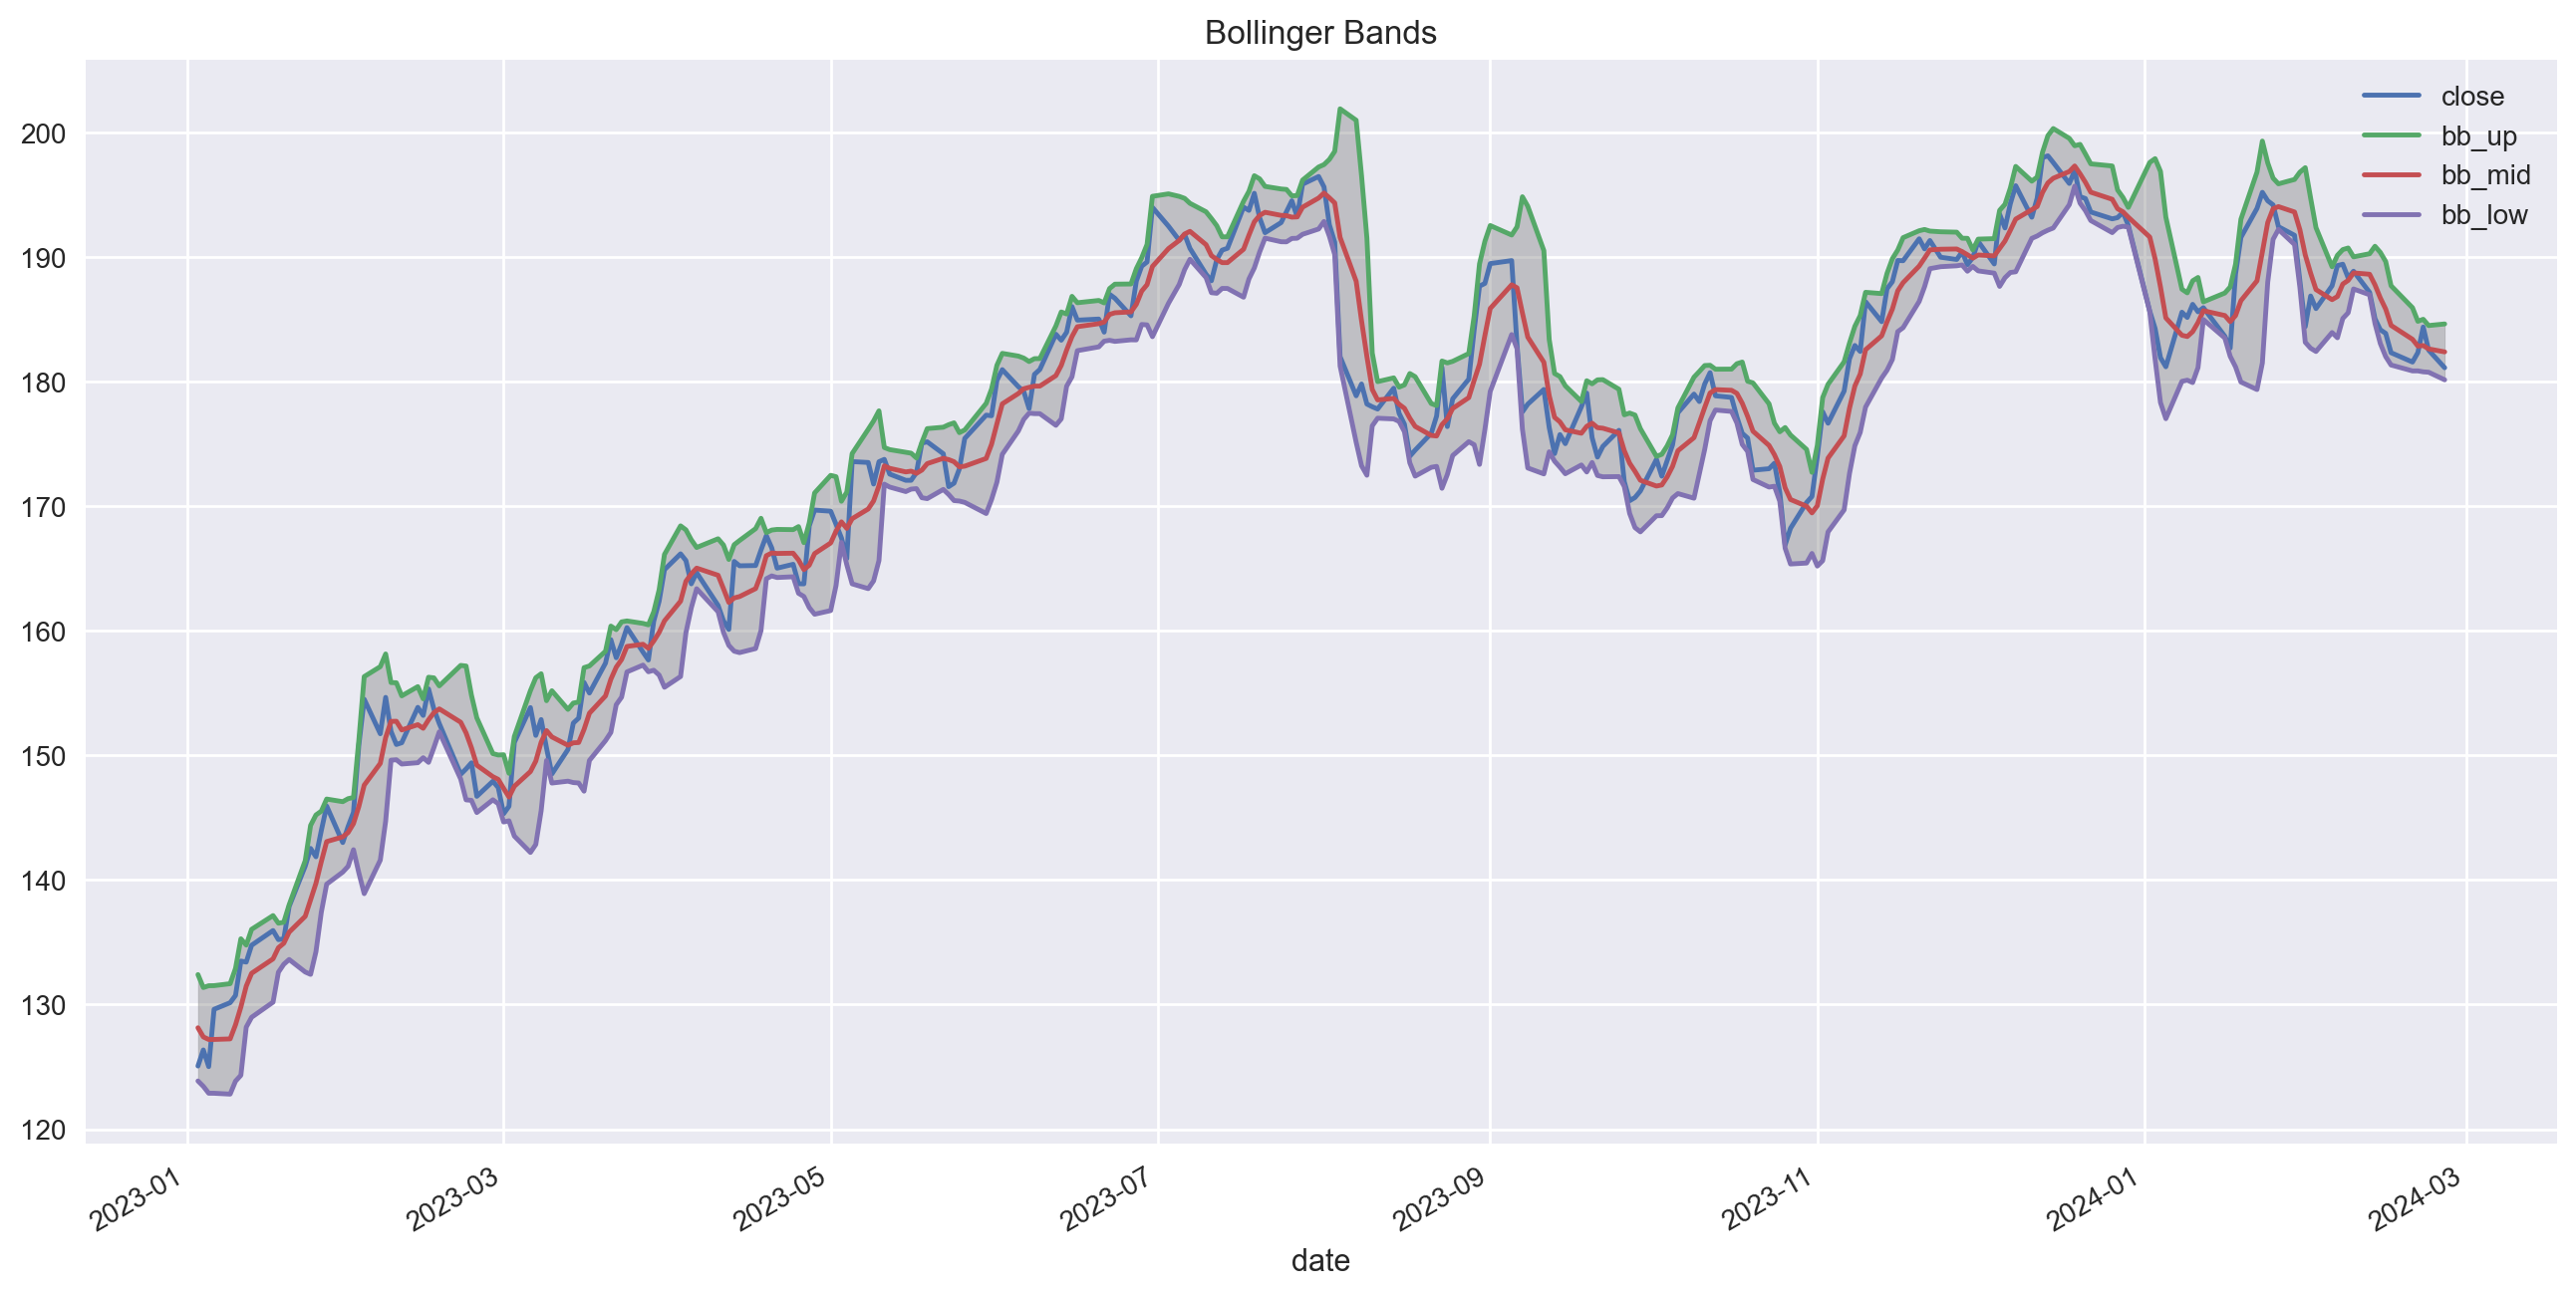

In [7]:
df["bb_up"], df["bb_mid"], df["bb_low"] = talib.BBANDS(df["close"])

plot_df = df["2023":]

fig, ax = plt.subplots()

plot_df.loc[:, ["close", "bb_up", "bb_mid", "bb_low"]].plot(
    ax=ax, title="Bollinger Bands"
)

ax.fill_between(
    plot_df.index, plot_df["bb_low"], plot_df["bb_up"], color="gray", alpha=0.4
);

### Relative Strength Index

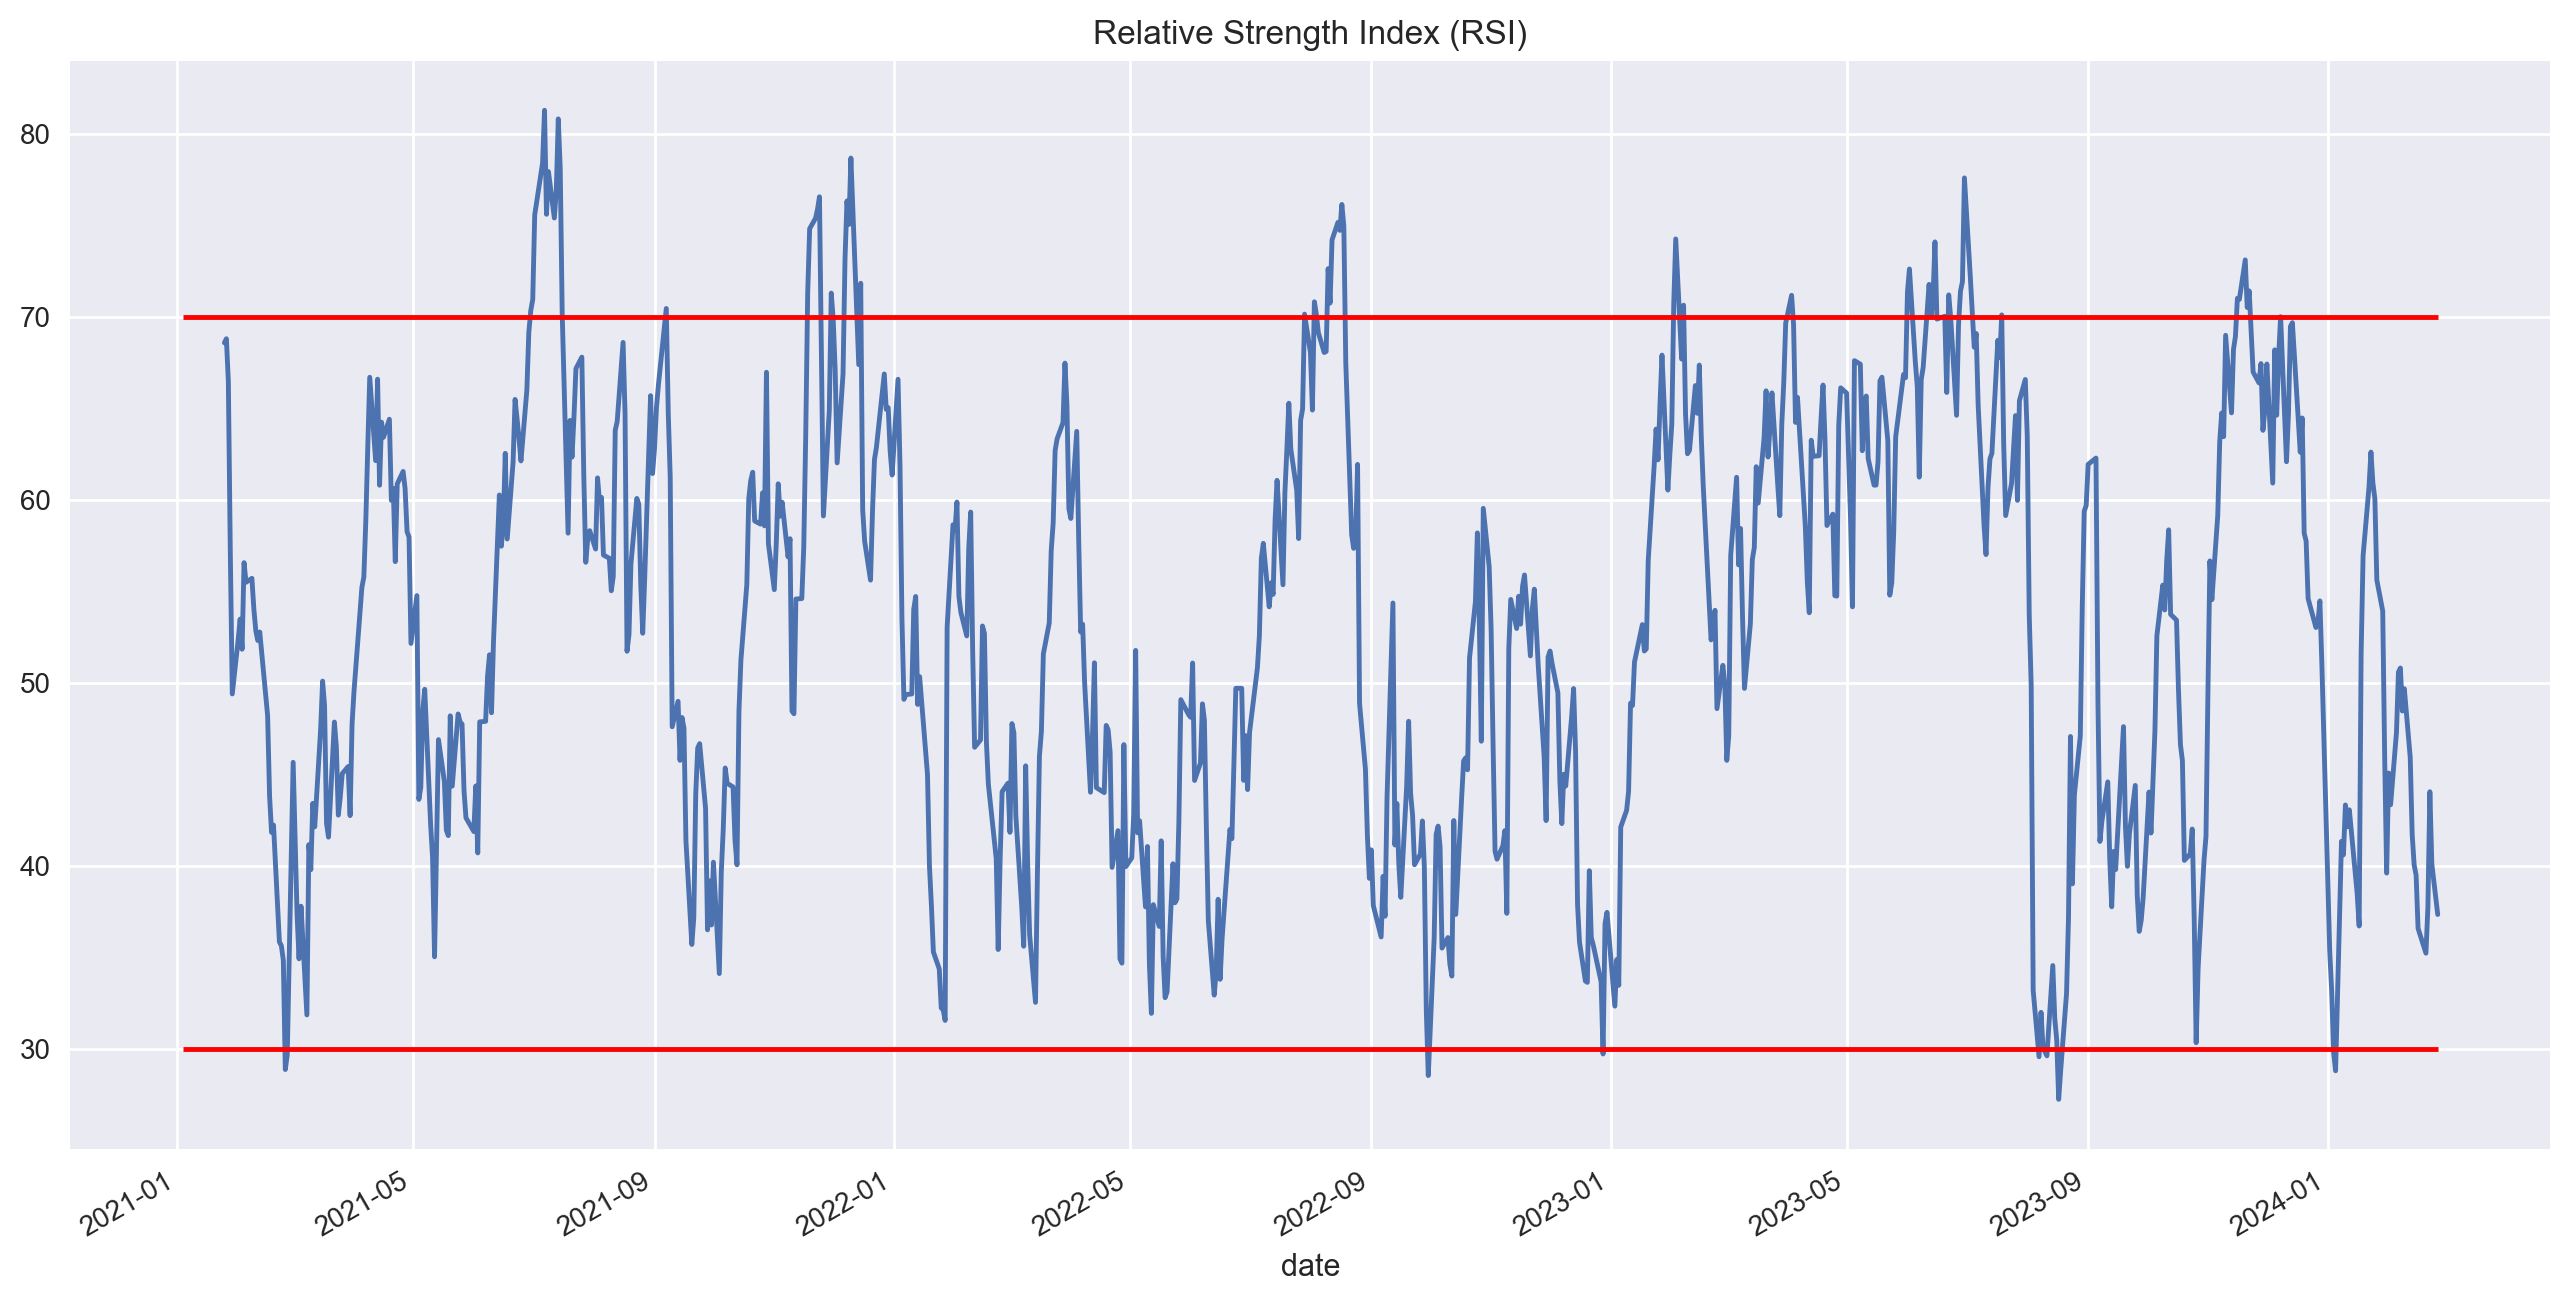

In [8]:
df["rsi"] = talib.RSI(df["close"])

fig, ax = plt.subplots()
df["rsi"].plot(ax=ax, title="Relative Strength Index (RSI)")
ax.hlines(y=30, xmin=df.index.min(), xmax=df.index.max(), color="red")
ax.hlines(y=70, xmin=df.index.min(), xmax=df.index.max(), color="red");

### Moving Average Convergence Divergence

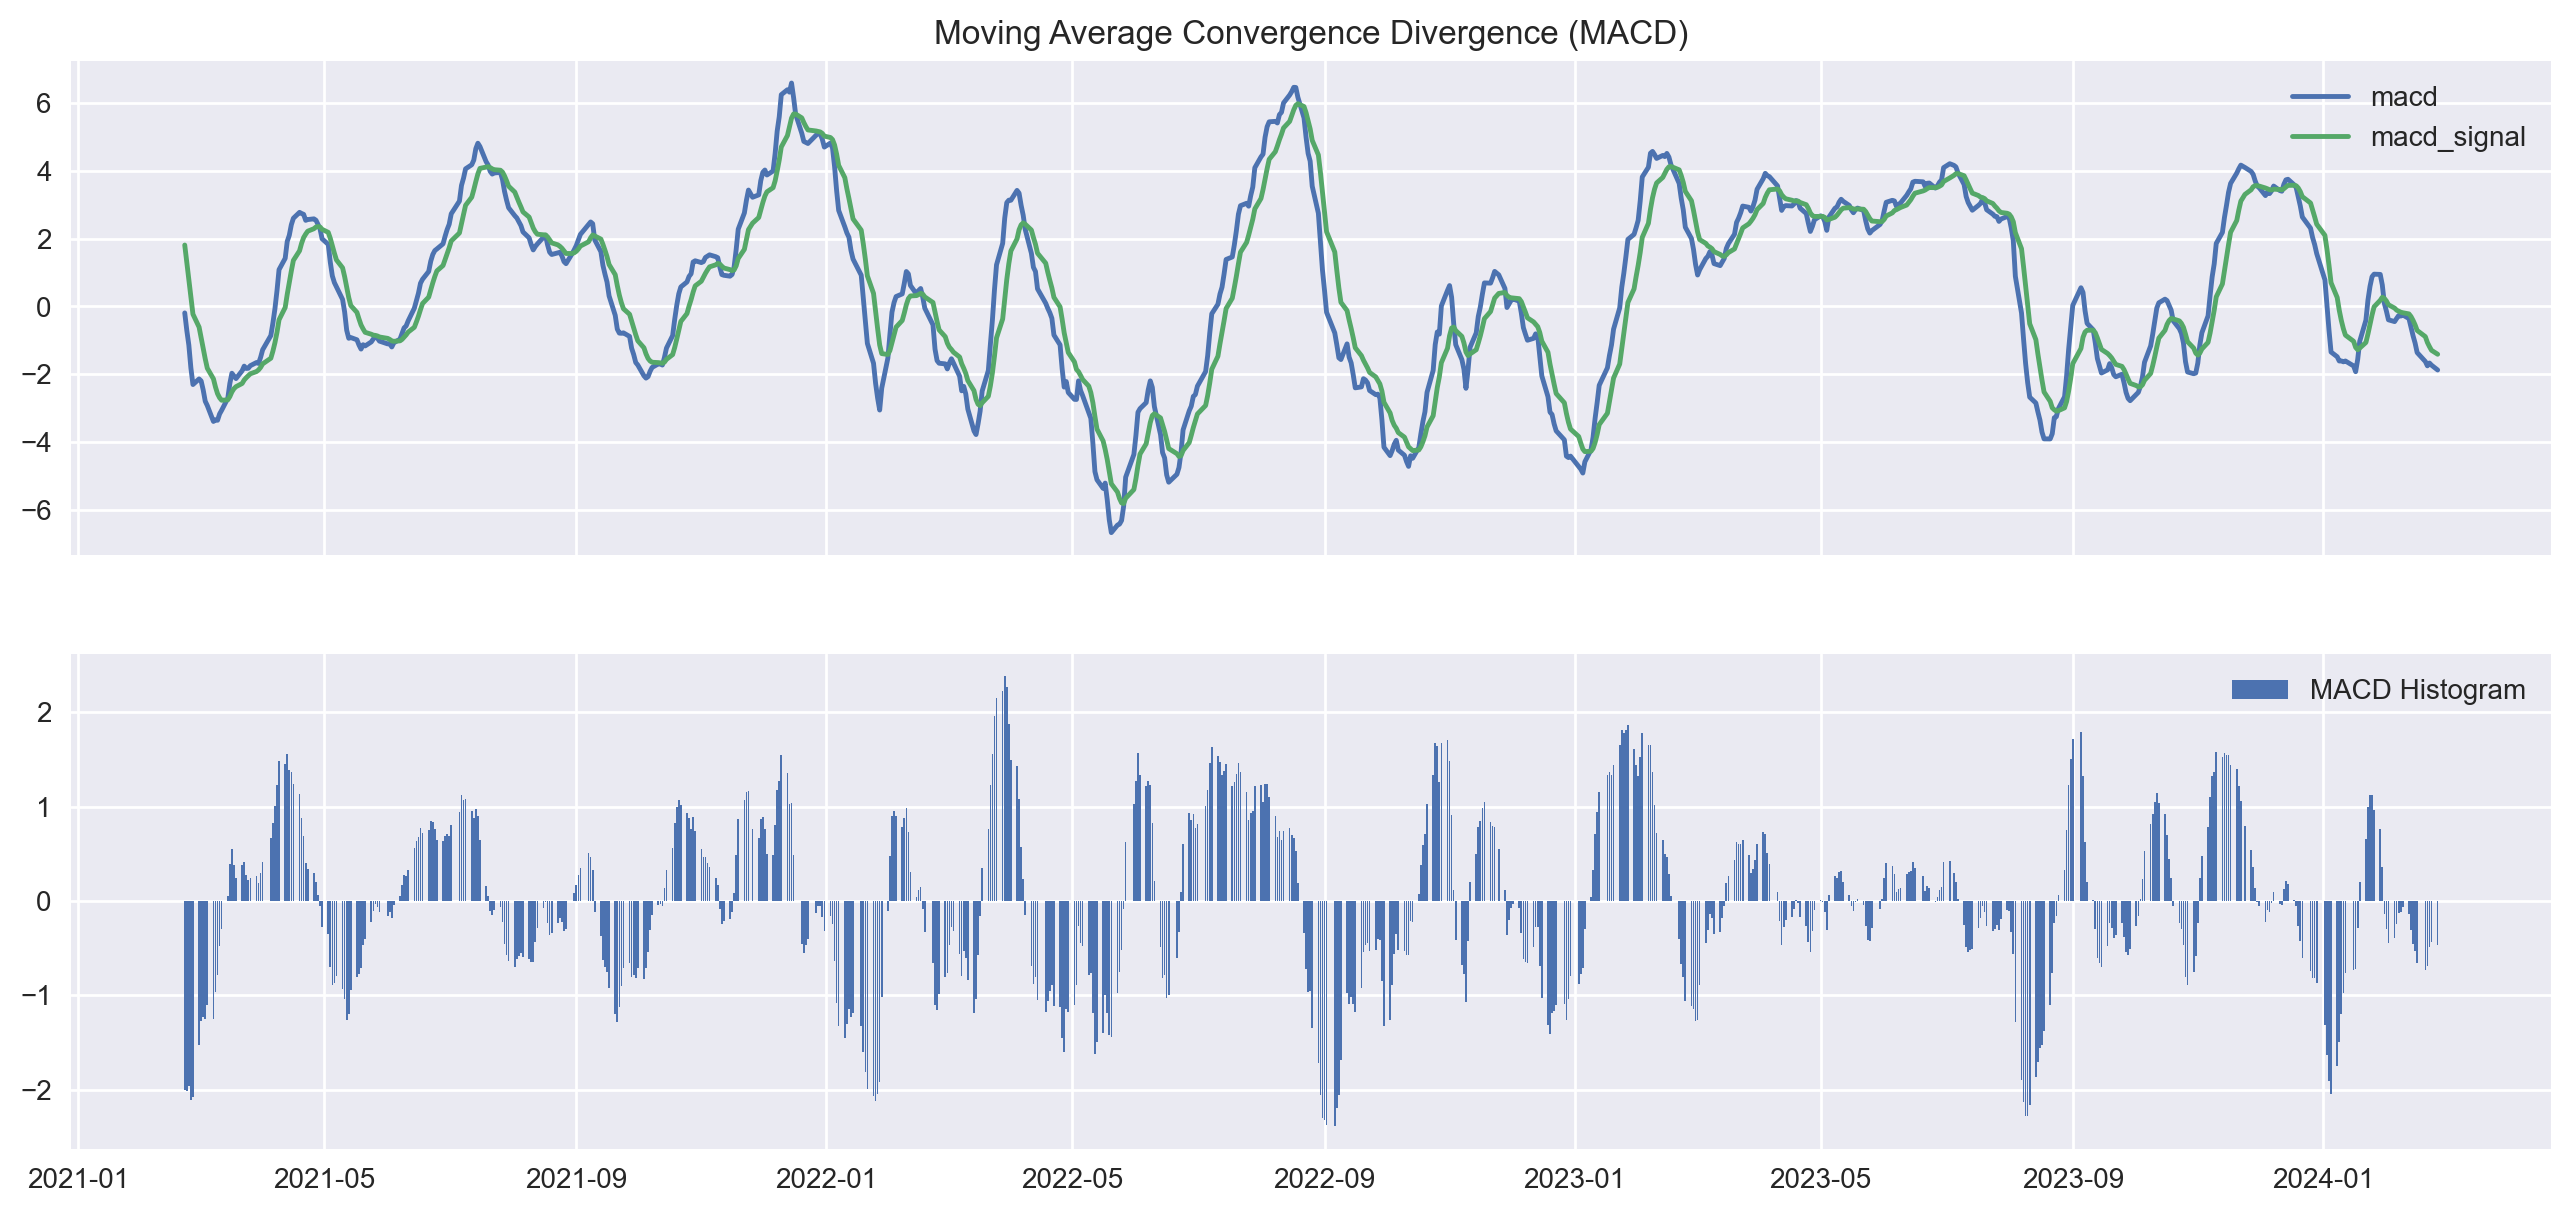

In [9]:
df["macd"], df["macd_signal"], df["macd_hist"] = talib.MACD(
    df["close"], fastperiod=12, slowperiod=26, signalperiod=9
)

fig, ax = plt.subplots(2, 1, sharex=True)
df[["macd", "macd_signal"]].plot(
    ax=ax[0], title="Moving Average Convergence Divergence (MACD)"
)
ax[1].bar(df.index, df["macd_hist"].values, label="MACD Histogram")
ax[1].legend();

## Inspecting all available technical indicators

In [10]:
available_tis = talib.get_function_groups()
available_tis

{'Cycle Indicators': ['HT_DCPERIOD',
  'HT_DCPHASE',
  'HT_PHASOR',
  'HT_SINE',
  'HT_TRENDMODE'],
 'Math Operators': ['ADD',
  'DIV',
  'MAX',
  'MAXINDEX',
  'MIN',
  'MININDEX',
  'MINMAX',
  'MINMAXINDEX',
  'MULT',
  'SUB',
  'SUM'],
 'Math Transform': ['ACOS',
  'ASIN',
  'ATAN',
  'CEIL',
  'COS',
  'COSH',
  'EXP',
  'FLOOR',
  'LN',
  'LOG10',
  'SIN',
  'SINH',
  'SQRT',
  'TAN',
  'TANH'],
 'Momentum Indicators': ['ADX',
  'ADXR',
  'APO',
  'AROON',
  'AROONOSC',
  'BOP',
  'CCI',
  'CMO',
  'DX',
  'MACD',
  'MACDEXT',
  'MACDFIX',
  'MFI',
  'MINUS_DI',
  'MINUS_DM',
  'MOM',
  'PLUS_DI',
  'PLUS_DM',
  'PPO',
  'ROC',
  'ROCP',
  'ROCR',
  'ROCR100',
  'RSI',
  'STOCH',
  'STOCHF',
  'STOCHRSI',
  'TRIX',
  'ULTOSC',
  'WILLR'],
 'Overlap Studies': ['BBANDS',
  'DEMA',
  'EMA',
  'HT_TRENDLINE',
  'KAMA',
  'MA',
  'MAMA',
  'MAVP',
  'MIDPOINT',
  'MIDPRICE',
  'SAR',
  'SAREXT',
  'SMA',
  'T3',
  'TEMA',
  'TRIMA',
  'WMA'],
 'Pattern Recognition': ['CDL2CROWS',
  'C

In [11]:
available_tis.keys()

dict_keys(['Cycle Indicators', 'Math Operators', 'Math Transform', 'Momentum Indicators', 'Overlap Studies', 'Pattern Recognition', 'Price Transform', 'Statistic Functions', 'Volatility Indicators', 'Volume Indicators'])

In [12]:
len(available_tis.values())

10

In [13]:
total_items = 0
for lst in available_tis.values():
    total_items += len(lst)
print(f"Total number of TIs: {total_items}")

Total number of TIs: 158
